# Problem Statement - ML-based OCR


### Introduction
In this project, we aim to develop an image classification model using various machine learning algorithms. The goal is to accurately classify images into different categories based on their content. 
### Dataset
We will be using a carefully curated dataset of 1000 images containing 5 different characters in each image. Each image is associated with a corresponding label indicating the alphabet present in the image.

### Approach
Our approach involves training and evaluating multiple machine learning algorithms on the image dataset. We will explore various models, including convolutional neural networks (CNN), support vector machines (SVM), random forests, XGBoost, and MLP classifiers. Each algorithm will be optimized to achieve the highest possible accuracy.

### Evaluation Metrics
To assess the performance of our models, we will primarily focus on accuracy, which measures the percentage of correctly classified images. Additionally, we may consider other evaluation metrics such as precision, recall, and F1-score to gain insights into the model's performance across different classes.




In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import cv2
import skimage.io as io
import zipfile
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation
from tabulate import tabulate

In [4]:
#Setting a random seed to ensure same results
np.random.seed(42)

## Extracting images from the different zip files:
Unzipping the five sample files and storing the 1000 images in a temporary folder.

In [5]:
#Providing the paths to all the zip files 
zip_paths=['/content/gdrive/MyDrive/JPMC/samples1-200.zip',
           '/content/gdrive/MyDrive/JPMC/samples201-400.zip',
           '/content/gdrive/MyDrive/JPMC/samples401-600.zip',
           '/content/gdrive/MyDrive/JPMC/samples601-800.zip',
           '/content/gdrive/MyDrive/JPMC/samples801-1000.zip']
#Specifying the path to store all the images.
extract_path='/content/gdrive/MyDrive/JPMC/images'

# Extract the contents of the zip file
for zip_path in zip_paths:
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    #Storing the extracted zip files to the created images folder(extract_path)
      zip_ref.extractall(extract_path)             


print('Extraction completed.')

Extraction completed.


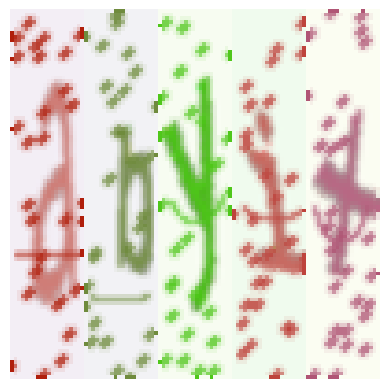

In [6]:
#Checking if the images are extracted properly
demo_image_path = '/content/gdrive/MyDrive/JPMC/images/abyix.png'
# Load the image
image = cv2.imread(demo_image_path)
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

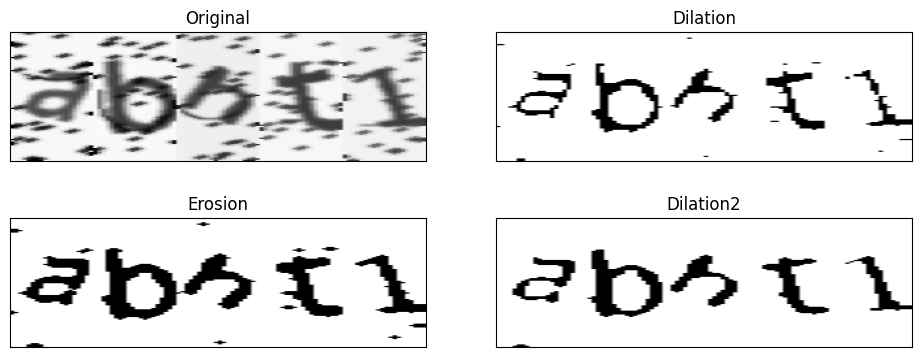

In [7]:
#Trying image processing in a single image
image='/content/gdrive/MyDrive/JPMC/images/abhtl.png'
img = io.imread(image, as_gray = True)

threshold = threshold_otsu(img)
img_binary = img > threshold


kernel=np.ones((3,3),np.uint8)
img_dilated=dilation(img_binary,kernel)


img_eroded=erosion(img_dilated)

kernel=np.ones((4,1),np.uint8)
img_dilated_2=dilation(img_eroded,kernel)

titles=['Original','Dilation','Erosion','Dilation2']
images=[img,img_dilated,img_eroded,img_dilated_2]
# Plot the image before and after dilation.
fig, axs = plt.subplots(2, 2, figsize=(10, 4))
fig.tight_layout(pad=2.0)
for i in range(4):
  plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',aspect='auto')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

##Processing the images:
Reading images from a directory, performing image preprocessing operations such as thresholding, dilation, and erosion, and then splitting the images into individual characters.

In [8]:
directory='/content/gdrive/MyDrive/JPMC/images/'
images = [] # stores all the 5000 images
labels = [] # stores all 5000 labels
height=100
width=20
for image_name in os.listdir(directory):
  image_path = directory + image_name #Defining the image path for each of the images.
  img = io.imread(image_path,as_gray=True) #Reading the image
  
  #Thresholding the image
  threshold = threshold_otsu(img) 
  image = img > threshold
  #Dilation of the image
  kernel=np.ones((3,3),np.uint8)
  image=dilation(image,kernel)
  #Erosion of the image
  image=erosion(image)
  #Dilation of the image with adjusted kernel
  #kernel=np.ones((4,1),np.uint8)
  #image=dilation(image,kernel)

  for i in range(5):
    #Splitting the image and appending it to images.
    images.append(image[:height,i*width:(i+1)*width].flatten()) 
    #Naming labels such that each label is a character
    labels.append(image_name[i])

print(len(images))

5000


##Sanity checking images:
We check if the images are being stored and processed properly by printing a random image from the array.

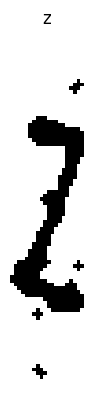

In [88]:
img_num= 4997 #choosing a number between 1 to 5000

plt.imshow(images[img_num-1].reshape(height, width, -1), 'gray')
plt.title(labels[img_num-1])
plt.axis('off')
plt.show()






##Train Test Splitting:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     images, labels, test_size=0.2, random_state=42)
print(len(X_train))

4000


##Testing and training with different models:

###Linear Regression for Classification:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.preprocessing import StandardScaler

#Performing linear regression and fitting the model
classifier_lr = LogisticRegression(random_state=42, max_iter=5000,C=0.1)
classifier_lr.fit(X_train, y_train)

#Checking the accuracy of the data
train_accuracy = accuracy_score(y_train, classifier_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, classifier_lr.predict(X_test))

# Calculating precision of the data
train_precision = precision_score(y_train, classifier_lr.predict(X_train),average='weighted')
test_precision = precision_score(y_test, classifier_lr.predict(X_test),average='weighted')

#Calculating recall of the data
train_recall = recall_score(y_train, classifier_lr.predict(X_train),average='weighted')
test_recall = recall_score(y_test, classifier_lr.predict(X_test),average='weighted')

#Calculating f1 score of the data
train_f1_score = f1_score(y_train, classifier_lr.predict(X_train),average='weighted')
test_f1_score = f1_score(y_test, classifier_lr.predict(X_test),average='weighted')

# Creating a table to print all the results
table = [["Metric", "Train", "Test"],
         ["Accuracy", train_accuracy, test_accuracy],
         ["Precision", train_precision, test_precision],
         ["Recall", train_recall, test_recall],
         ["F1 Score", train_f1_score, test_f1_score]]

# Print the table
table= "Linear Regression Model Results\n" + tabulate(table, headers="firstrow", tablefmt="grid")
print(table)

Linear Regression Model Results
+-----------+----------+----------+
| Metric    |    Train |     Test |
+===========+==========+==========+
| Accuracy  | 0.97     | 0.613    |
+-----------+----------+----------+
| Precision | 0.97026  | 0.626143 |
+-----------+----------+----------+
| Recall    | 0.97     | 0.613    |
+-----------+----------+----------+
| F1 Score  | 0.969999 | 0.613655 |
+-----------+----------+----------+


###Support Vector Machine for Classification:

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

# performing support vector machine algorithm for classification
classifier_svm = svm.SVC(random_state=42)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

# # comparing the predicted characters
# predicted_labels = classifier_svm.predict(images)
# for i in range(len(images)):
#     print("Image:", i+1, "Predicted Label:", predicted_labels[i])

# Calculating accuracy of the data
train_accuracy=accuracy_score(y_train,classifier_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Calculating precision
train_precision = precision_score(y_train, classifier_svm.predict(X_train), average='weighted')
test_precision = precision_score(y_test, y_pred,average='weighted')

# Calculating recall
train_recall = recall_score(y_train, classifier_svm.predict(X_train), average='weighted')
test_recall = recall_score(y_test,y_pred, average='weighted')

# Calculating F1 score
train_f1_score = f1_score(y_train,classifier_svm.predict(X_train), average='weighted')
test_f1_score = f1_score(y_test, y_pred,average='weighted')

# Creating a table to print all the results
table = [["Metric", "Train", "Test"],
         ["Accuracy", train_accuracy, test_accuracy],
         ["Precision", train_precision, test_precision],
         ["Recall", train_recall, test_recall],
         ["F1 Score", train_f1_score, test_f1_score]]

# Print the table
table = "SVM Model Results\n" + tabulate(table, headers="firstrow", tablefmt="grid")
print(table)

SVM Model Results
+-----------+----------+----------+
| Metric    |    Train |     Test |
+===========+==========+==========+
| Accuracy  | 0.91     | 0.724    |
+-----------+----------+----------+
| Precision | 0.916783 | 0.752775 |
+-----------+----------+----------+
| Recall    | 0.91     | 0.724    |
+-----------+----------+----------+
| F1 Score  | 0.911387 | 0.729471 |
+-----------+----------+----------+


###Random Forest for Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# performing random forest algorithm for classification
classifier_rfc = RandomForestClassifier(random_state=42)
classifier_rfc.fit(X_train, y_train)
y_pred = classifier_rfc.predict(X_test)

# Calculating accuracy of the data
train_accuracy=accuracy_score(y_train,classifier_rfc.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Calculating precision of the data
train_precision = precision_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_precision = precision_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating recall of the data
train_recall = recall_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_recall = recall_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating f1 score of the data
train_f1_score = f1_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_f1_score = f1_score(y_test, classifier_rfc.predict(X_test),average='weighted')

# Creating a table to print all the results
table = [["Metric", "Train", "Test"],
         ["Accuracy", train_accuracy, test_accuracy],
         ["Precision", train_precision, test_precision],
         ["Recall", train_recall, test_recall],
         ["F1 Score", train_f1_score, test_f1_score]]

# Print the table
table = "Random Forest Model Results\n" + tabulate(table, headers="firstrow", tablefmt="grid")
print(table)         


Random Forest Model Results
+-----------+---------+----------+
| Metric    |   Train |     Test |
+===========+=========+==========+
| Accuracy  |       1 | 0.694    |
+-----------+---------+----------+
| Precision |       1 | 0.724234 |
+-----------+---------+----------+
| Recall    |       1 | 0.694    |
+-----------+---------+----------+
| F1 Score  |       1 | 0.69657  |
+-----------+---------+----------+


##Tuning the SVM Model:

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': [None, 'balanced'],
}

# Create the grid search object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create the SVM model with the best parameters
classifier_svm = SVC(**best_params, random_state=42)

# Fit the SVM model to the training data
classifier_svm.fit(X_train, y_train)

# Predict using the SVM model
y_pred = classifier_svm.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Calculating the precision
precision = precision_score(y_test, y_pred, average='weighted')
# Calculating the recall score
recall = recall_score(y_test, y_pred, average='weighted')
# Calculating the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'C': 10.0, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.734
Precision: 0.7454311006790071
Recall: 0.734
F1 Score: 0.7357589507719908


####Confusion Matrix for SVM

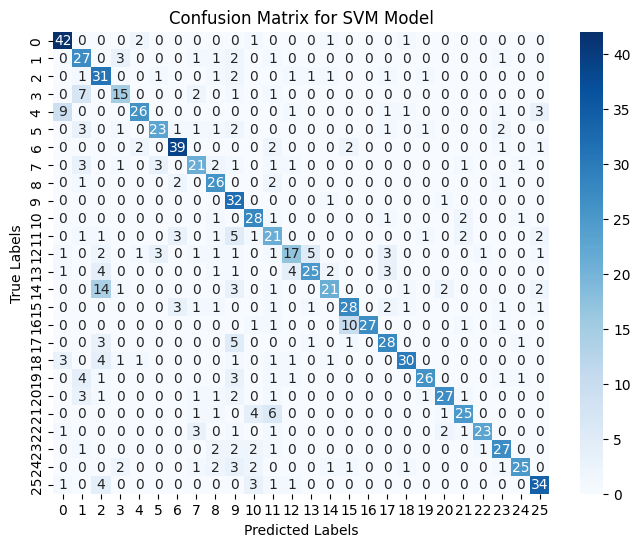

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6)) # Set the size of the figure
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Create a heatmap with annotations, using the 'Blues' color map
plt.title("Confusion Matrix for SVM Model")   # Set the title of the plot
plt.xlabel("Predicted Labels")  # Set the label for the x-axis
plt.ylabel("True Labels") # Set the label for the y-axis
plt.show()


###Finding Charcters with Low Accuracy in SVM Model:

In [12]:
# Define the different values of C to try
C_values = [0.1, 1, 10]

for C in C_values:
    # Create an instance of the SVM classifier with the current C value
    classifier_svm = svm.SVC(C=C, random_state=42)
    classifier_svm.fit(X_train, y_train)  # Fit the SVM classifier to the training data
    y_pred = classifier_svm.predict(X_test)  # Make predictions on the test data

    predicted_labels = classifier_svm.predict(images)
    #for i in range(len(images)):
       # Print misclassified labels
        #if labels[i] != predicted_labels[i]:
            #print(labels[i], "  ", predicted_labels[i])

    #Predict labels for all the images using the trained SVM classifier
    predicted_labels = classifier_svm.predict(images)
    character_accuracy = {}

    for character in set(labels):
      # Get the indices of the samples corresponding to the current character
        character_indices = [i for i in range(len(labels)) if labels[i] == character]
      # Extract the actual labels and predicted labels for the current character
        character_actual = [labels[i] for i in character_indices]
        character_predicted = [predicted_labels[i] for i in character_indices]
      # Calculate the accuracy for the current character
        character_accuracy[character] = accuracy_score(character_actual, character_predicted)

    # Printing each character accuracy
    print("Character Accuracy:")
    print(tabulate(character_accuracy.items(), headers=["Character", "Accuracy"], tablefmt="grid"))


z    l
h    b
a    z
a    l
b    j
m    j
i    l
x    w
d    b
d    j
r    l
a    j
c    z
g    x
t    j
d    b
a    j
d    x
t    f
d    b
d    l
y    l
a    w
c    l
o    j
c    j
i    l
e    z
a    s
e    m
o    z
r    l
c    j
d    j
m    l
h    b
d    b
z    j
h    l
m    f
f    j
a    w
i    l
b    f
f    j
m    l
h    b
z    l
v    x
p    j
a    j
t    f
a    s
k    j
l    j
c    j
u    l
h    l
a    l
q    l
c    l
p    l
o    j
k    w
g    l
a    j
n    l
n    l
f    l
a    w
e    j
a    j
c    j
a    j
q    p
q    p
h    b
v    l
i    x
c    l
a    w
i    j
a    z
o    j
a    l
t    l
g    j
h    x
t    f
v    l
t    f
a    z
u    j
e    m
i    j
m    j
p    l
m    x
a    y
u    l
o    n
n    m
v    j
c    l
t    f
w    l
e    a
m    p
x    j
w    l
r    c
v    x
h    b
l    j
h    b
c    j
u    a
y    j
s    j
o    n
m    j
b    j
a    w
e    a
c    l
c    z
t    j
n    z
b    l
d    l
k    l
d    x
n    l
d    b
q    p
w    j
e    a
l    j
e    y
x    j
b    j
e    y
y    l

##Other Algorithms:
Trying other models to see accuracies shown by different models 

###Convolutional Neural Network Model:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor
from torchvision import transforms

Splitting images:

Here we split the images without flattening it and store the images and labels in two lists.






In [ ]:
pictures = [] # stores all the 5000 images
label= [] # stores all 5000 labels
for image_name in os.listdir(directory):
  image_path = directory + image_name
  image = cv2.imread(image_path)

  for i in range(5):
    pictures.append(image[:height,i*width:(i+1)*width])
    label.append(image_name[i])
print('Converted 1000 images to 5000 images')

Converted 1000 images to 5000 images


Defining the CNN model:

The model consists of two convolutional layers followed by max pooling, and two fully connected layers where it takes an input image and performs forward propagation to generate predictions for 26 different classes of alphabets.

In [ ]:
class CNNModel(nn.Module):
    #Defining the layers
    def __init__(self):
        super(CNNModel, self).__init__()  
        # Convolutional layer 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 25 * 5, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 26)  # 26 classes for alphabets

    #Defining the forward pass of the model.
    def forward(self, x):
        x = self.conv1(x)       # Convolutional layer 1
        x = self.relu1(x)       # ReLU activation
        x = self.pool1(x)       # Max pooling
        
        x = self.conv2(x)       # Convolutional layer 2
        x = self.relu2(x)       # ReLU activation
        x = self.pool2(x)       # Max pooling
        
        x = x.view(x.size(0),-1)   # Flatten the tensor
        x = self.fc1(x)         # Fully connected layer 1
        x = self.relu3(x)       # ReLU activation
        x = self.fc2(x)         # Fully connected layer 2
        return x

Preparing the dataset and performing train-test split:

In [ ]:
# Convert images and labels to tensors
images = [ToTensor()(img) for img in pictures]
labels = torch.tensor([ord(label) - ord('a') for label in label])

# Concatenate images and labels into a single dataset
dataset = list(zip(images, labels))

In [ ]:
# Define the train-test split ratio
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

# Split dataset into training and testing without flattening
train_data1, test_data1 = random_split(dataset, [train_size, test_size])

# Define data loaders for training and testing
batch_size = 32
train_loader = DataLoader(train_data1, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data1, batch_size=batch_size, shuffle=False)

# Create an instance of the CNN model
model = CNNModel()
#print(model)

In [114]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

Training loop:

Training the CNN model for a specified number of epochs. It iterates over the training data, performs forward and backward passes, updates the model parameters, and tracks the loss and accuracy. After each epoch, it prints the epoch number, loss, and accuracy.

In [110]:
#Define the number of training epochs
num_epochs = 10  

# Determine the device to be used for training (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

# Move the model to the specified device
model.to(device)

# Iterate over each epoch
for epoch in range(num_epochs):
    running_loss = 0.0  # Initialize the running loss for the current epoch
    correct_predictions = 0  # Initialize the number of correct predictions for the current epoch

    # Iterate over the training data batches
    for images, labels in train_loader:
        # Move the images and labels tensors to the specified device and convert images to float type
        images = images.to(device).float()
        labels = labels.to(device)

        # Convert model parameters to float type and move the model to the specified device
        model = model.float().to(device)

        # Perform the forward pass
        outputs = model(images)
        # Compute the loss
        loss = criterion(outputs, labels)

         # Perform backward pass and optimize the model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the running loss and count the number of correct predictions
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()
        
    # Calculate the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / len(train_data1)
    # Print the epoch number, loss, and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch [1/10], Loss: 0.0212, Accuracy: 99.45%
Epoch [2/10], Loss: 0.0010, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0008, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0008, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0009, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0010, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0011, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0014, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0018, Accuracy: 100.00%
Epoch [10/10], Loss: 0.2634, Accuracy: 91.22%


Finding the Accuracy on Validation Set:

Setting the model to evaluation mode, then iterates over the validation data, performs the forward pass, calculates the predicted labels, and updates the counts of correct predictions and total examples and finally calculating the accuracy.

In [111]:
# Validation loop
model.eval()  # Set the model to evaluation mode

# Initialize variables for tracking correct predictions and total examples in validation set
val_correct_predictions = 0
val_total = 0

# Disable gradient calculation to save memory and computation
with torch.no_grad():
  # Iterate over the validation data
    for images, labels in test_loader:
        # Move the images and labels tensors to the specified device
        images = images.to(device)
        labels = labels.to(device)

        # Perform the forward pass
        outputs = model(images)

        # Calculate the predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Update the total count of examples in validation set
        val_total += labels.size(0)

        # Update the count of correct predictions
        val_correct_predictions += (predicted == labels).sum().item()

#Calculating the validation accuracy
val_accuracy = 100 * val_correct_predictions / val_total

print(f"Validation Accuracy: {val_accuracy:.2f}%")

Validation Accuracy: 83.30%


###Neural Network Model:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# Create an instance of MLPClassifier
classifier_mlp = MLPClassifier(hidden_layer_sizes=(200,200), random_state=42,max_iter=2000,activation='relu')

# Reshape X_train and X_test to 2D arrays if needed
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Train the MLPClassifier on the training data
classifier_mlp.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = classifier_mlp.predict(X_test)

# Calculate the accuracy of the classifier
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy=accuracy_score(y_train,classifier_rfc.predict(X_train))

# Calculating precision of the data
train_precision = precision_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_precision = precision_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating recall of the data
train_recall = recall_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_recall = recall_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating f1 score of the data
train_f1_score = f1_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_f1_score = f1_score(y_test, classifier_rfc.predict(X_test),average='weighted')

# Creating a table to print all the results
table = [["Metric", "Train", "Test"],
         ["Accuracy", train_accuracy, test_accuracy],
         ["Precision", train_precision, test_precision],
         ["Recall", train_recall, test_recall],
         ["F1 Score", train_f1_score, test_f1_score]]

# Print the table
table = "MLP Model Results\n" + tabulate(table, headers="firstrow", tablefmt="grid")
print(table)         


MLP Model Results
+-----------+---------+----------+
| Metric    |   Train |     Test |
+===========+=========+==========+
| Accuracy  |       1 | 0.652    |
+-----------+---------+----------+
| Precision |       1 | 0.724234 |
+-----------+---------+----------+
| Recall    |       1 | 0.694    |
+-----------+---------+----------+
| F1 Score  |       1 | 0.69657  |
+-----------+---------+----------+


###XG Boost Model:

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical representation
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an instance of XGBoost classifier
classifier_xgb = xgb.XGBClassifier()

# Train the XGBoost classifier on the training data
classifier_xgb.fit(X_train, y_train_encoded)

# Predict the labels for the test data
y_pred_encoded = classifier_xgb.predict(X_test)

# Convert the predicted labels back to their original form
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculating accuracy of the data
train_accuracy=accuracy_score(y_train,classifier_rfc.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Calculating precision of the data
train_precision = precision_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_precision = precision_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating recall of the data
train_recall = recall_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_recall = recall_score(y_test, classifier_rfc.predict(X_test),average='weighted')

#Calculating f1 score of the data
train_f1_score = f1_score(y_train, classifier_rfc.predict(X_train),average='weighted')
test_f1_score = f1_score(y_test, classifier_rfc.predict(X_test),average='weighted')

# Creating a table to print all the results
table = [["Metric", "Train", "Test"],
         ["Accuracy", train_accuracy, test_accuracy],
         ["Precision", train_precision, test_precision],
         ["Recall", train_recall, test_recall],
         ["F1 Score", train_f1_score, test_f1_score]]

# Print the table
table = "XG Boost Model Results\n" + tabulate(table, headers="firstrow", tablefmt="grid")
print(table)         

XG Boost Model Results
+-----------+---------+----------+
| Metric    |   Train |     Test |
+===========+=========+==========+
| Accuracy  |       1 | 0.675    |
+-----------+---------+----------+
| Precision |       1 | 0.724234 |
+-----------+---------+----------+
| Recall    |       1 | 0.694    |
+-----------+---------+----------+
| F1 Score  |       1 | 0.69657  |
+-----------+---------+----------+


#Answers:

1.	In the testing we did we found that the **SVM Model** gave the best results in terms of not only accuracy but also other parameters we used to compare the three algorithms. While accuracy is considered to be a good parameter that by itself is not enough to compare the models, especially in scenarios with imbalanced classes or when different types of errors have varying costs. In such cases, additional metrics can provide a more comprehensive evaluation of the models. Some of the other metrics we used are:



> **Precision**:It measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It is useful when the cost of false positives is high.


> **Recall (Sensitivity)**: It measures the proportion of correctly predicted positive instances out of all actual positive instances. It is useful when the cost of false negatives is high.


> **F1 Score**: It combines precision and recall into a single metric, providing a balanced measure of model performance. It is useful when you want to consider both precision and recall simultaneously.


In our code we saw that the SVM model had better results in all four metrics therefore we can say with more conviction that for our samples the SVM model worked better than the rest of the models.










2. We performed hyperparameter tuning using GridSearchCV to improve the accuracy of the **SVM Model**. This algorithm exhaustively searches through all possible combinations for the hyperparameters to evaluate the performance of the SVM Model and based on the highest performance metric, selects the best combination of hyperparameters. We got the best combination of hyperparameters: ‘C’, ‘gamma’, ‘kernel’, and ‘class_weight’.
> **‘C’**: We tested the values [0.1, 1.0, 10.0]. This parameter is responsible for controlling the trade-off between achieving low training error and low testing error. The higher  C values tested led to more complex decision boundaries, which resulted in better training accuracy of the model.

  > **‘Gamma’** : We tested the values [0.01, 0.1, 1.0, 10.0]. This parameter affects the sharpe of the decision boundary. The higher gamma values tested led to more complex decision boundaries.

  >**‘Kernel’** : We tested ‘linear’, ‘rbf’, ‘poly’ for the kernel. We used the linear kernel for linear decision boundaries, and Radial Basis Function (rbf) and Polynomial (poly) for non-linear decision boundaries.

  >**Class Weight**: We tested the options [None, ‘balanced’]. This parameter determines the weight adjustment of different classes in the dataset. ‘balanced’ adjusts the weights inversely proportional to class frequencies to deal with imbalanced datasets. 


3. We have found out the recall, f1 score and the precision for each of the three models and have displayed the same in the code above. We see that the SVM model has the highest value among the three models in all the above metrics.

4. **(a)** 

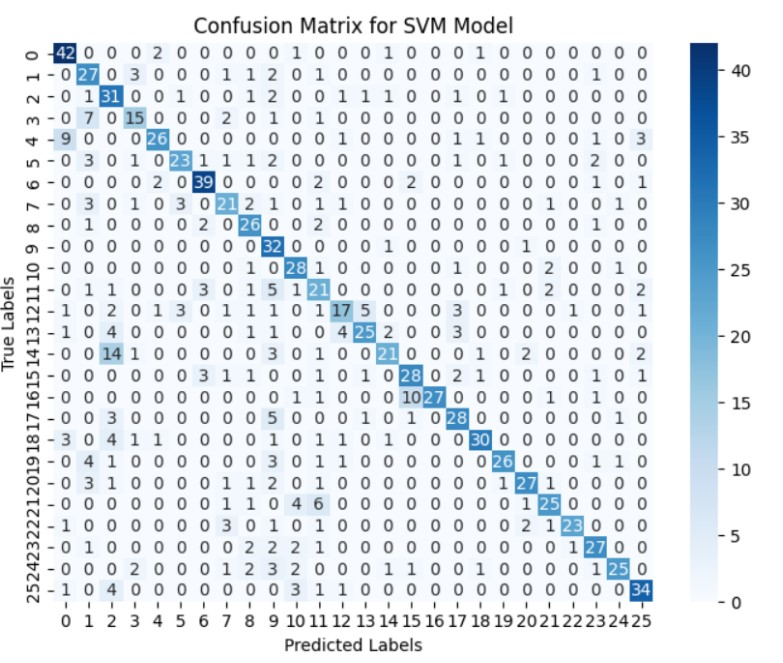

**(b)** We have computed the accuracy values for each character (for SVM model).
The characters in increasing order of accuracy values are:
o, l, t, b, v, d, h, y, r, m, n, p, x, u, e, f, c, k, s, q, g, z, i, j, q, a  
The characters which have relatively less accuracy are: 
o, l, t, b, v, d, h, y

**(c)** The reasons why the above characters have low accuracy are:
> These characters have shapes or patterns similar to other characters or have overlapping strokes, which makes it difficult to distinguish them perfectly, thereby decreasing their accuracy. For eg: (l,t), (h,b)

> We have chosen the SVM model which might not be suitable to identify a specific character. There might be another algorithm which identifies a specific character with more accuracy.


5. We implemented three models where one of the models showed good accuracy and was better than the SVM model. The **CNN or Convoluted Neural Network model** showed the best accuracy out of all the models implemented. The CNN model is in fact widely used for image classification and it is a better model for the following reasons:


> CNNs automatically learn hierarchical representations of image data.

> They exhibit translation invariance, making them robust to object position changes.

> Parameter sharing in CNNs reduces the number of parameters and enhances efficiency.

> CNNs capture spatial relationships through pooling layers.

We also tried implementing models like **XGBoost and Neural Network model** using Mlp classifier but gave lower accuracy that the SVM model. This could be attributed to several factors. SVM had fewer hyperparameters to tune compared to XGBoost and MLP models so that simplified the optimization process. Also, XGBoost and MLP models require extensive feature engineering and pre-processing to achieve optimal performance.






---

In conclusion, our image classification project yielded promising results with the **CNN model** achieving the highest accuracy of **83.3%**. This demonstrates the effectiveness of leveraging convolutional neural networks for image classification tasks. The **SVM model**, even after tuning, followed closely with an accuracy of **72.6%**, indicating its capability in handling complex data patterns. However, the linear regression model performed comparatively lower with an accuracy of 61.3%, suggesting its limited suitability for image classification. Based on these findings, we recommend utilizing the CNN model for accurate image classification tasks, while considering the SVM model as a viable alternative depending on specific requirements and computational constraints. 
We therfore summarise all the models implemented along with their accuracy in the below table:

                                  | Model              | Accuracy |
                                  |--------------------|----------|
                                  | CNN                | 83.3%    |
                                  | SVM (Tuned)        | 73.4%    |
                                  | Random Forest      | 69.4%    |
                                  | XGBoost            | 67.5%    |
                                  | MLP Classifier     | 65.2%    |
                                  | Linear Regression  | 61%      |



---

